In [196]:
#import data and packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib

In [197]:
data=gpd.read_file('final/noe_oebo_points2.geojson')

In [198]:
data.replace({'ASP':'CAS'},inplace=True)

In [199]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

In [200]:
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')
GKZ=geopandas.read_file('plotting_data/GKZ_bounds.gpkg')

In [201]:
mountains=gpd.read_file( r'C:\Users\fabrizio\Documents\uni\GIS\input\height_model/hoehst_will.shp')
mountains=mountains.to_crs(data.crs)
terrain_dissolved=mountains.dissolve('GRIDCODE')

In [202]:
def get_colors(string):
    colors=string.strip().split(', ')
    print(colors)
    return colors
sample='#6a00ff, #ff00ff, #ff0040, #ff9500, #ffff00, #aaff00, #00ff15, #00ffff, #0095ff'

get_colors(sample)

['#6a00ff', '#ff00ff', '#ff0040', '#ff9500', '#ffff00', '#aaff00', '#00ff15', '#00ffff', '#0095ff']


['#6a00ff',
 '#ff00ff',
 '#ff0040',
 '#ff9500',
 '#ffff00',
 '#aaff00',
 '#00ff15',
 '#00ffff',
 '#0095ff']

['#e03524', '#f07c12', '#ffc200', '#90bc1a', '#21b534', '#0095ac', '#1f64ad', '#4040a0', '#903498']


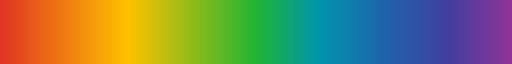

In [203]:
sample='#e03524, #f07c12, #ffc200, #90bc1a, #21b534, #0095ac, #1f64ad, #4040a0, #903498'
#sample='#0a0c08, #842bd7, #ff206e, #fbff12, #41ead4, #2fff00, #ff0202, #ff6700, #ffffff'
decades_colors=get_colors(sample)
cmap_decades = matplotlib.colors.LinearSegmentedColormap.from_list("", decades_colors)
cmap_decades

In [204]:
# configure plotting environment
xmin, ymin, xmax, ymax = data.geometry.total_bounds

# get custom cmaps
color_list=['#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
color_list.reverse()

colors_tech=['#0c1b2b', '#32cbcb','#5c7aff', '#fb232e', '#dbf679', '#ffff82']
cmap_tech = matplotlib.colors.LinearSegmentedColormap.from_list("", colors_tech)

terrain_labels=[
'lowland (110 - 350)',
'hilly land (351 - 500)',
'submontane (501-700)',
'mid-montane (701-1000)',
'high montane (1001 -1300)',
'lower subalpine (1301 - 1600)',
'subalpine (1601-1900)',
'alpine (> 1901)']

both=color_list+colors_tech
cmap_both = matplotlib.colors.LinearSegmentedColormap.from_list("", both)


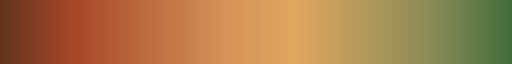

In [205]:
cmap


In [206]:
simplified=data
simplified.loc[simplified.tech_type=='MBR', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='RBC', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='Filtration', 'tech_type']='Primary'
simplified.loc[simplified.tech_type=='TRF', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='BKF', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='Fest', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='ASP', 'tech_type']='CAS'


simplified.tech_type.value_counts()

SBR        3216
CW         1370
CAS        1077
Primary     544
Other       362
nd          195
Name: tech_type, dtype: int64

In [207]:
missing_dist=basemap[basemap.PB=='Amstetten'].dissolve('PB')


In [208]:
fontsize_colorbar=17
fontsize_cmap=fontsize_colorbar-2

<AxesSubplot:>

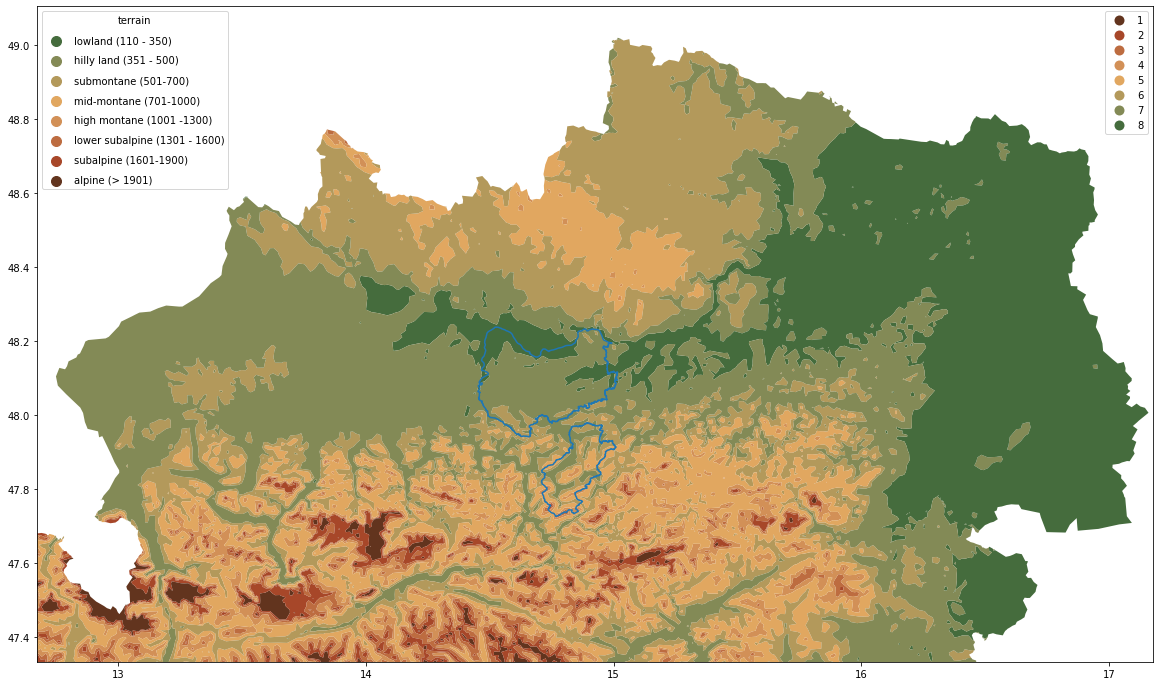

In [209]:

fig,ax=plt.subplots(1,figsize=(20,30))

mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=True)
for value,color in zip(list(terrain_labels),color_list):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1, title='terrain',bbox_transform=ax.transAxes, bbox_to_anchor=[0, 1])
ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)
missing_dist.geometry.boundary.plot(ax=ax)

In [210]:
title_terrain='topographic category,altitude (m.s.l.) and treatment type'
tech_labels=['CAS','CW','Other','Primary','SBR','no data']

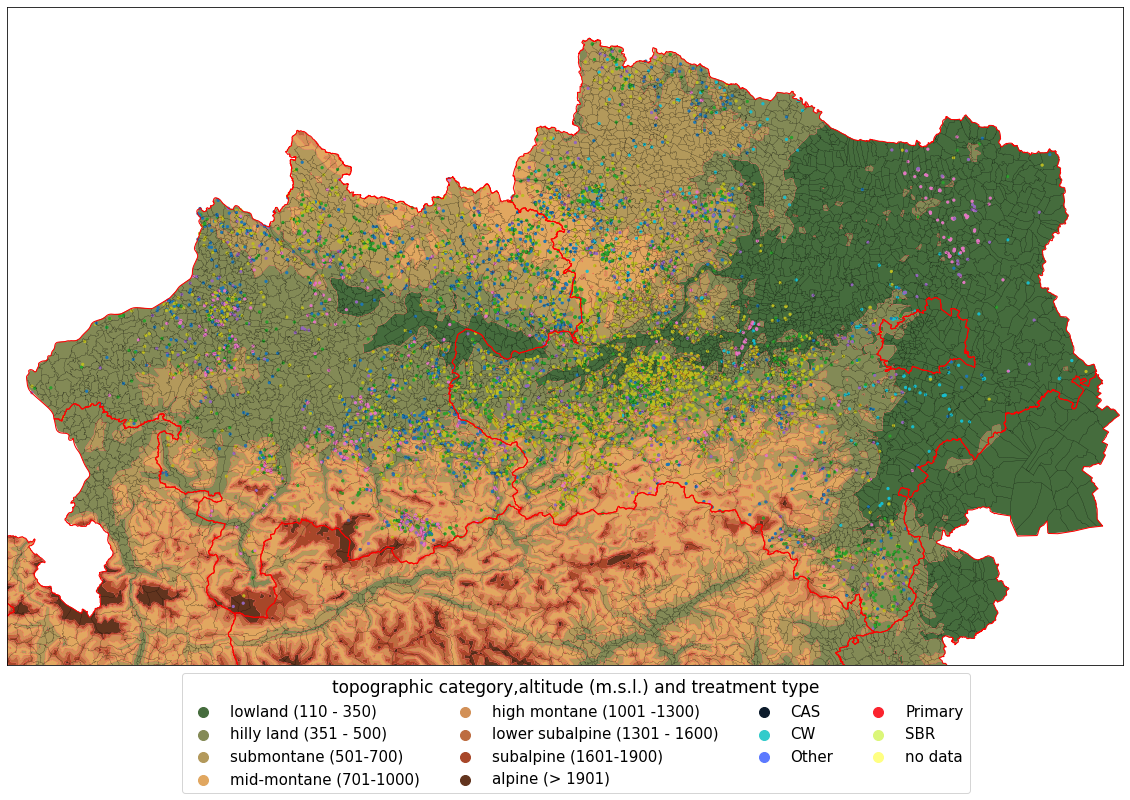

In [211]:
fig,ax=plt.subplots(1,figsize=(20,30))
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=False)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)


#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

for value,color in zip(list(terrain_labels+tech_labels),both):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left',fontsize=15,title_fontsize=17,ncol=4 ,title=title_terrain,bbox_transform=ax.transAxes, bbox_to_anchor=[0.15, 0])
simplified.plot(ax=ax,categorical=True,column='tech_type', markersize=5)

ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_points_tech.png', bbox_inches='tight' )

KeyboardInterrupt: 

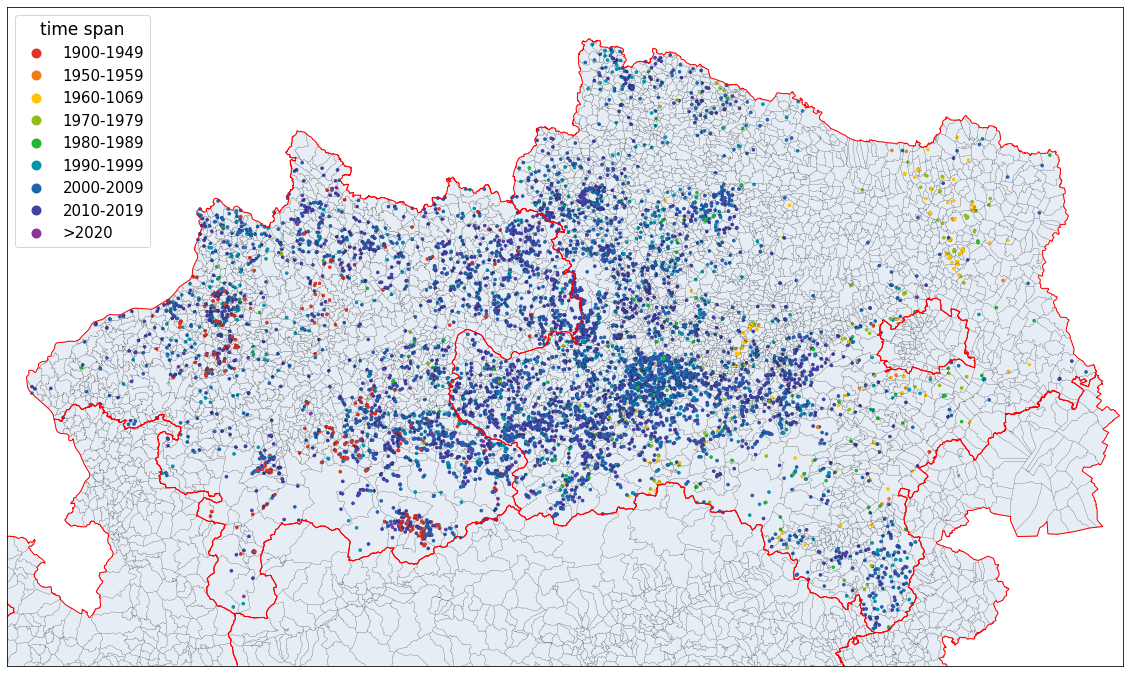

In [212]:
fig,ax=plt.subplots(1,figsize=(20,30))

basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

data.plot(ax=ax,column='year',legend=True,scheme="User_Defined", cmap=cmap_decades,
markersize=7, classification_kwds=dict(bins=[1949,1959,1969,1979,1989,1999,2009,2019]),
legend_kwds={'fontsize':fontsize_cmap,'labels':['1900-1949','1950-1959','1960-1069','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019', '>2020'],
'title':'time span','title_fontsize':fontsize_colorbar} )#


ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/decades.png', bbox_inches='tight' )

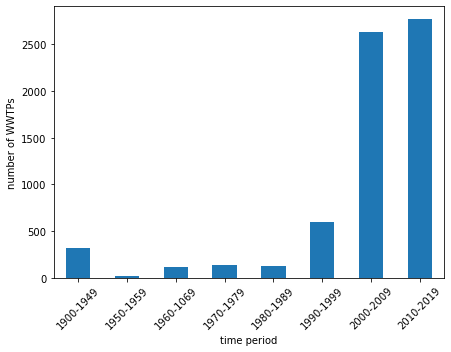

In [ ]:
simplified['time period']=pd.cut(simplified.year, [1900,1949,1959,1969,1979,1989,1999,2009,2019],
labels=['1900-1949','1950-1959','1960-1069','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019'])
categories=simplified.groupby('time period').count().reset_index()
fig, ax= plt.subplots(1, figsize=(7,5))

categories.plot.bar(y='PE',x='time period',stacked=True,legend=False,ax=ax)
plt.xticks(rotation=45)
plt.ylabel('number of WWTPs')
plt.savefig('graphs/decades.png', bbox_inches='tight' )

In [ ]:
to_plot=data
to_plot.loc[to_plot.no_nitri=='true','no_nitri']='only primary treatment'
to_plot.loc[to_plot.no_nitri=='false','no_nitri']='primary and secondary treatment'
to_plot.loc[to_plot.no_nitri=='nd','no_nitri']='no data'

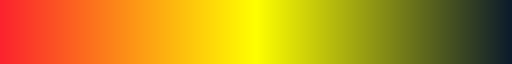

In [ ]:
colors_tech=['#fb232e','#FFFF00',  '#0c1b2b']
both2=color_list+colors_tech
cmap_tech2 = matplotlib.colors.LinearSegmentedColormap.from_list("", colors_tech)
cmap_tech2

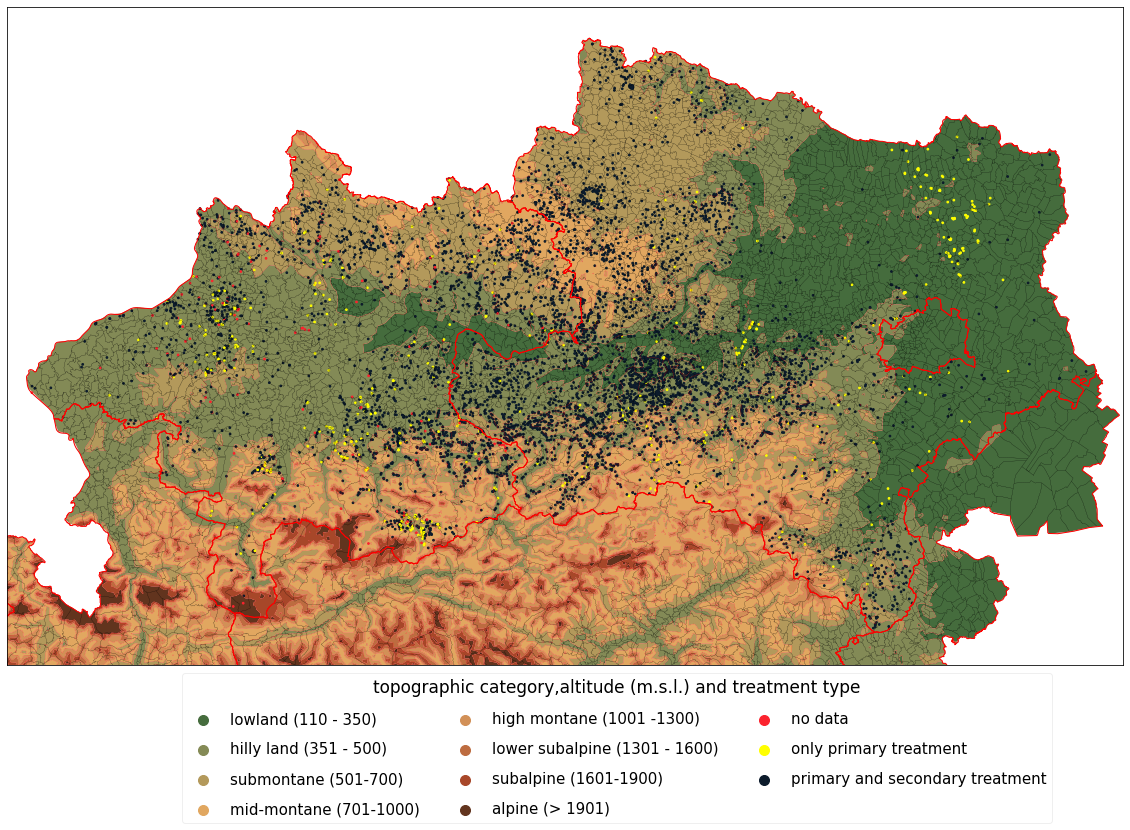

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
color_list=['#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)

mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=False)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

title_terrain='topographic category,altitude (m.s.l.) and treatment type'

category_labels=['no data','only primary treatment','primary and secondary treatment']

for value,color in zip(list(terrain_labels+category_labels),both2):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,ncol=3,fontsize=15,framealpha=0.3,title_fontsize=17,loc='upper left',labelspacing=1, title=title_terrain,bbox_transform=ax.transAxes, bbox_to_anchor=[0.15, 0])
to_plot.plot(ax=ax,categorical=True,column='no_nitri',legend=False, markersize=3, cmap=cmap_tech2)
#legend_kwds={'labels':['primary and secondary treatment','no data', 'only primary treatment']})
#data[data.no_nitri=='only primary treatment'].plot(ax=ax,categorical=True,column='no_nitri',legend=True, markersize=3, cmap=cmap_tech2)

ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_nitri.png', bbox_inches='tight' )

In [ ]:
data=geopandas.read_file('final/complete.geojson')


In [ ]:
# get custom cmaps
color_list=['#0000FF','#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
terrain_labels2=terrain_labels
print(terrain_labels2)

['lowland (110 - 350)', 'hilly land (351 - 500)', 'submontane (501-700)', 'mid-montane (701-1000)', 'high montane (1001 -1300)', 'lower subalpine (1301 - 1600)', 'subalpine (1601-1900)', 'alpine (> 1901)']


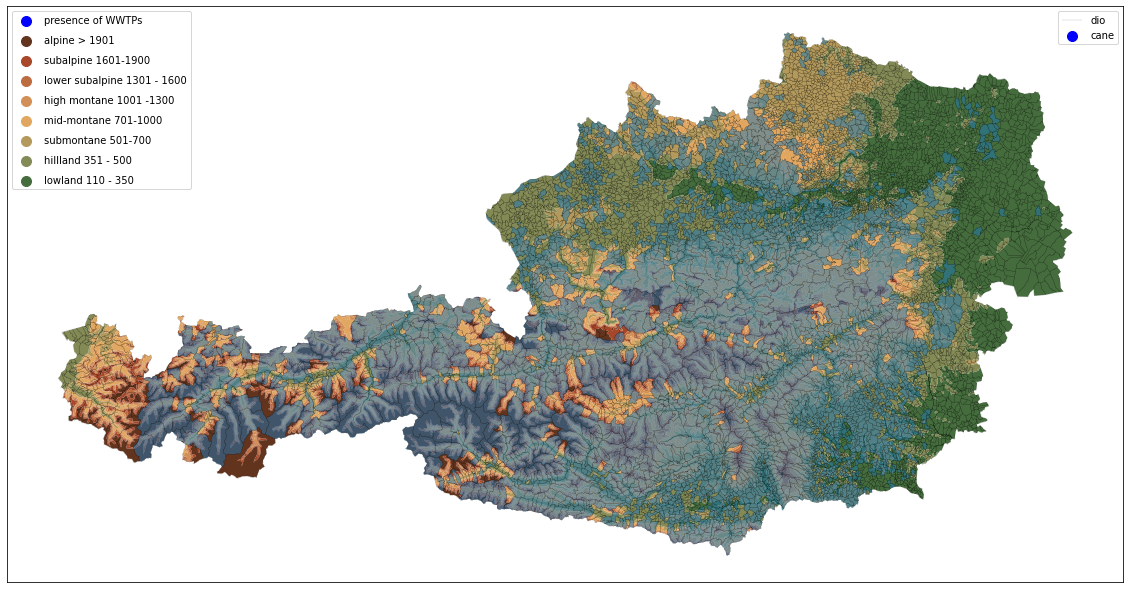

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
#BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

for value,color in zip(list(reversed(terrain_labels2)),color_list):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1,bbox_transform=ax.transAxes, bbox_to_anchor=[0, 1])
data[data['freq_small']>1].plot(ax=ax, alpha=0.5,legend=True)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_freq.png', bbox_inches='tight' )

In [ ]:
pop1000=gpd.read_file('final/pop1000.gpkg/pop1000.shp')

99.66024915062287

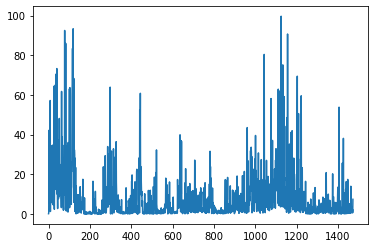

In [ ]:
pop1000.per1000peo.plot()
pop1000.per1000peo.max()

In [ ]:
import matplotlib as mpl
num_colors = 9
cm = mpl.cm.get_cmap(name='Blues')
currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
currentColors
cmap_blues = matplotlib.colors.LinearSegmentedColormap.from_list("", currentColors)
cmap_blues

c=np.array([currentColors])
c


array([[[0.96862745, 0.98431373, 1.        , 1.        ],
        [0.88250673, 0.92919646, 0.97244137, 1.        ],
        [0.79935409, 0.8740792 , 0.94488274, 1.        ],
        [0.67189542, 0.81437908, 0.90065359, 1.        ],
        [0.51058824, 0.73230296, 0.85883891, 1.        ],
        [0.34646674, 0.63240292, 0.81067282, 1.        ],
        [0.21568627, 0.52941176, 0.75424837, 1.        ],
        [0.10557478, 0.41262591, 0.68596694, 1.        ],
        [0.03137255, 0.30191465, 0.58840446, 1.        ]]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

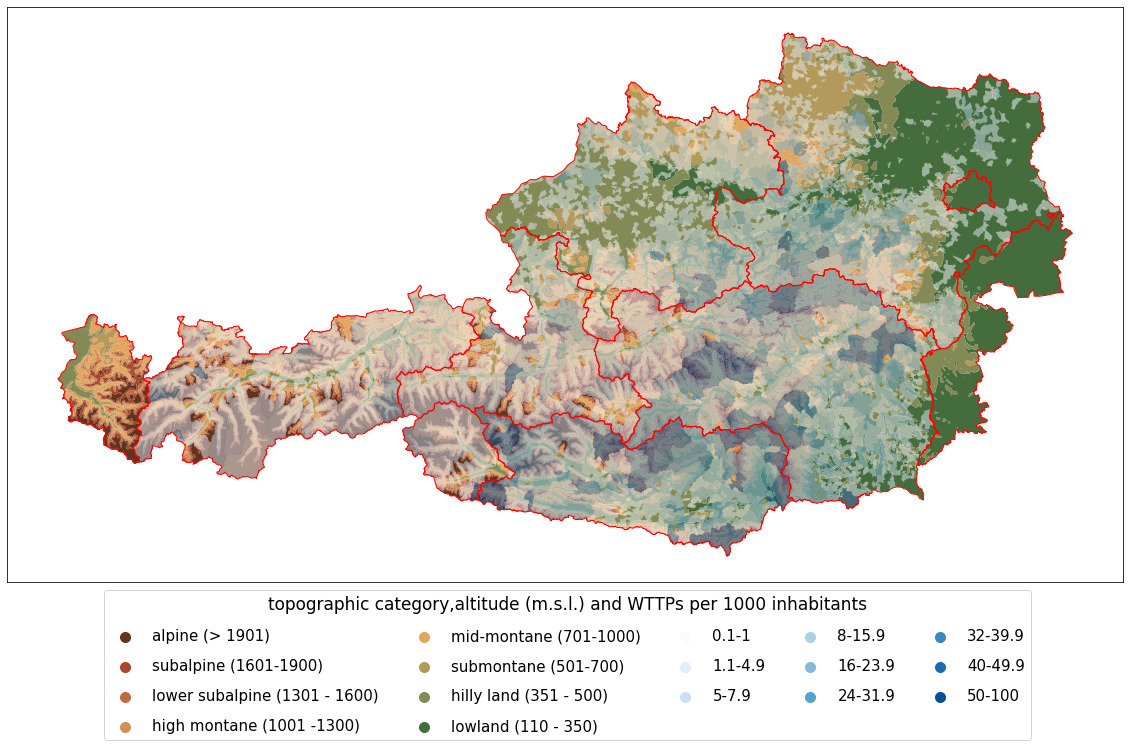

In [217]:
fig,ax=plt.subplots(1,figsize=(20,30))
color_list=['#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

legend_lab=['0.1-1','1.1-4.9','5-7.9','8-15.9','16-23.9','24-31.9','32-39.9','40-49.9','50-100']
terrain_labels.reverse()

for value,color in zip(terrain_labels+legend_lab,color_list+currentColors):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1,title_fontsize=fontsize_colorbar,
fontsize=fontsize_cmap,title='topographic category,altitude (m.s.l.) and WTTPs per 1000 inhabitants',
bbox_transform=ax.transAxes,ncol=5, bbox_to_anchor=[0.08, 0])
pop1000[pop1000.per1000peo>0.0].plot(column='per1000peo',alpha=0.5,ax=ax,scheme="User_Defined",
classification_kwds=dict(bins=[1,5,8,16,24,32,40,50,100]),legend=False,cmap=cmap_blues)



plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_freq.png', bbox_inches='tight' )

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
#BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

legend_lab=['0.1','1','5','8','16','24','32','40','50','100']

for value,color in zip(list(reversed(terrain_labels2)),color_list):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1,bbox_transform=ax.transAxes, bbox_to_anchor=[0, 1])
pop1000[pop1000.per1000peo>0.0].plot(column='per1000peo',alpha=0.5,ax=ax,scheme="User_Defined",
classification_kwds=dict(bins=[1,5,8,16,24,32,40,50,100]),legend=True,cmap='Blues', legend_kwds={'fmt':'{:.1f}'})



plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_freq.png', bbox_inches='tight' )

<AxesSubplot:>

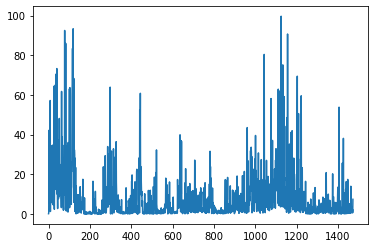

In [ ]:
pop1000.per1000peo.plot()

In [ ]:
data.plot(ax=ax,column='year',legend=True,scheme="User_Defined", cmap=cmap_decades,
markersize=7, classification_kwds=dict(bins=[1949,1959,1969,1979,1989,1999,2009,2019]),
legend_kwds={'labels':['1900-1949','1950-1959','1960-1069','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019', '>2020']} )#


KeyError: 'year'

<AxesSubplot:>

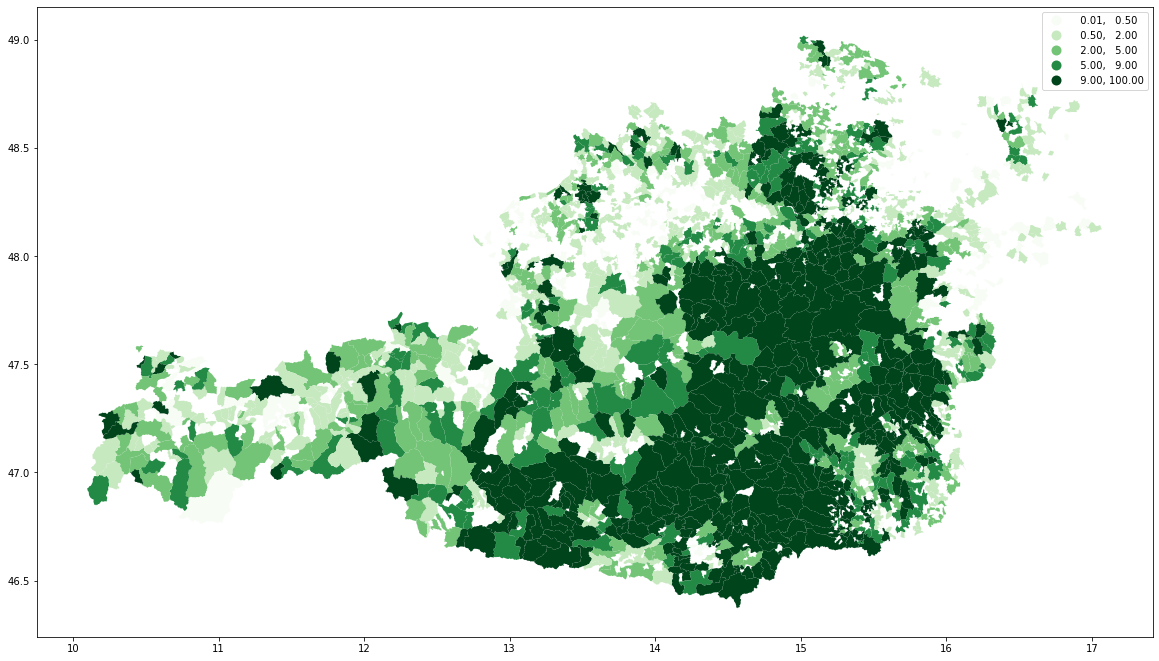

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
pop1000[pop1000.per1000peo>0.0].plot(column='per1000peo',ax=ax,scheme="User_Defined",classification_kwds=dict(bins=[0.5,2,5,9,100]),
 alpha=1,legend=True,cmap='Greens')  #,legend_kwds={'shrink': 0.25}


In [ ]:
def count_per_unit(data, column):
    look=data.groupby(['BEZIRK',column]).count()['PE'].reset_index()
    look=look[look.no_nitri=='only primary treatment'].sort_values('PE',ascending=False)
    return look

In [ ]:
look=simplified.groupby(['BEZIRK','time period']).count()['PE'].reset_index()
look[look['time period']<'1980-1989'].sort_values('PE',ascending=False).head(10)


BEZIRK time period  PE
99              Mistelbach   1970-1979  46
98              Mistelbach   1960-1069  43
171          Wien Umgebung   1970-1979  17
123               Scheibbs   1970-1979  17
138       St. Pölten-Stadt   1960-1069  16
83              Lilienfeld   1970-1979  12
82              Lilienfeld   1960-1069  11
122               Scheibbs   1960-1069  11
155  Waidhofen a. d. Thaya   1970-1979   6
91                    Melk   1970-1979   6

In [ ]:
simplified[simplified.year<1989].groupby('BEZIRK').count().sort_values('BL',ascending=False).head(10)

BL  NAME  PE  bautyp  id  no_nitri  tech_type  year  \
BEZIRK                                                                   
Mistelbach         95    95  95      95  95        95         95    95   
Scheibbs           38    38  38      38  38        38         38    38   
Lilienfeld         36    36  36      36  36        36         36    36   
Wien Umgebung      30    30  28      30  30        30         30    30   
Melk               26    26  26      26  26        26         26    26   
St. Pölten-Stadt   25    25  25      25  25        25         25    25   
Neunkirchen        14    14  14      14  14        14         14    14   
Baden              13    13  13      13  13        13         13    13   
Wr. Neustadt-Land  13    13  13      13  13        13         13    13   
Amstetten          13    13  13      13  13        13         13    13   

                   geometry  time period  
BEZIRK                                    
Mistelbach               95           95  
Scheibbs                 38           38  
Lilienfeld               36           36  
Wien Umgebung            30           30  
Melk                     26           26  
St. Pölten-Stadt         25           25  
Neunkirchen              14           14  
Baden                    13           13  
Wr. Neustadt-Land        13           13  
Amstetten                13           13

In [ ]:
simplified[simplified.year<1950].groupby('BL').count()

BEZIRK  NAME   PE  bautyp  id  no_nitri  tech_type  year  \
BL                                                                        
Lower-Austria       2     2    1       2   2         2          2     2   
Upper-Austria       0   325  325     302   0       325        325   325   

               geometry  time period  
BL                                    
Lower-Austria         2            2  
Upper-Austria       325          325

In [ ]:
data.no_nitri.value_counts()
look=data.groupby(['BEZIRK','no_nitri']).count()['PE'].reset_index()
look[look.no_nitri=='only primary treatment'].sort_values('PE',ascending=False).head(5)


AttributeError: 'GeoDataFrame' object has no attribute 'no_nitri'

In [ ]:
mi=data.year.unique().min()
ma=data.year.unique().max()


# plotting every 10 years. nitrification by color

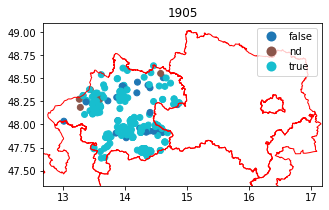

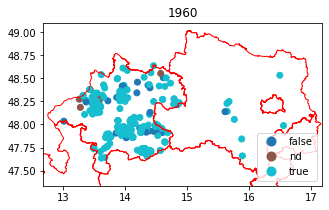

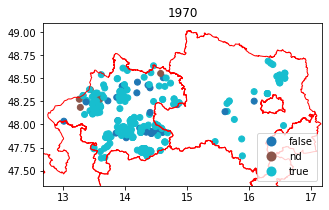

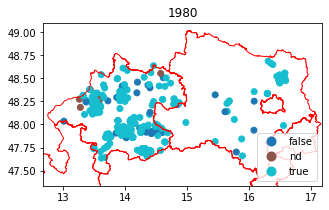

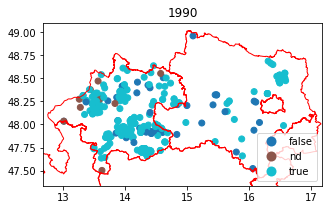

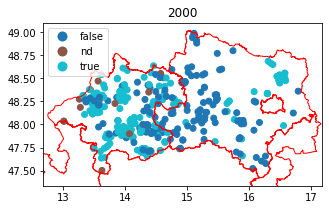

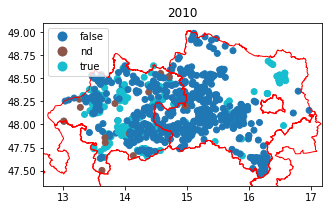

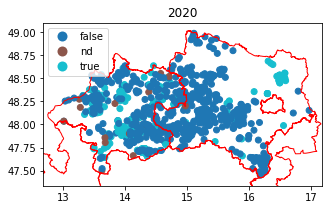

In [ ]:
final=gpd.GeoDataFrame()
for i in sorted(list(data.year.unique()))[::10]:
    fig,ax=plt.subplots(1,figsize=(5,15))
    mergetemp=data[data.year==i]
    final=gpd.GeoDataFrame(pd.concat([final,mergetemp], ignore_index=True), crs=final.crs)
    final.plot(column='no_nitri',ax=ax, legend=True)#,legend_kwds={'shrink': 0.10})    
    #plot KG boundaries
    #basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1,ax=ax)
    ax.set_xlim(xmin-0.1,xmax+0.15)
    ax.set_ylim(ymin-0.1,ymax+0.1)
    ax.set_title(i)


In [ ]:
small=simplified[simplified.PE<51]

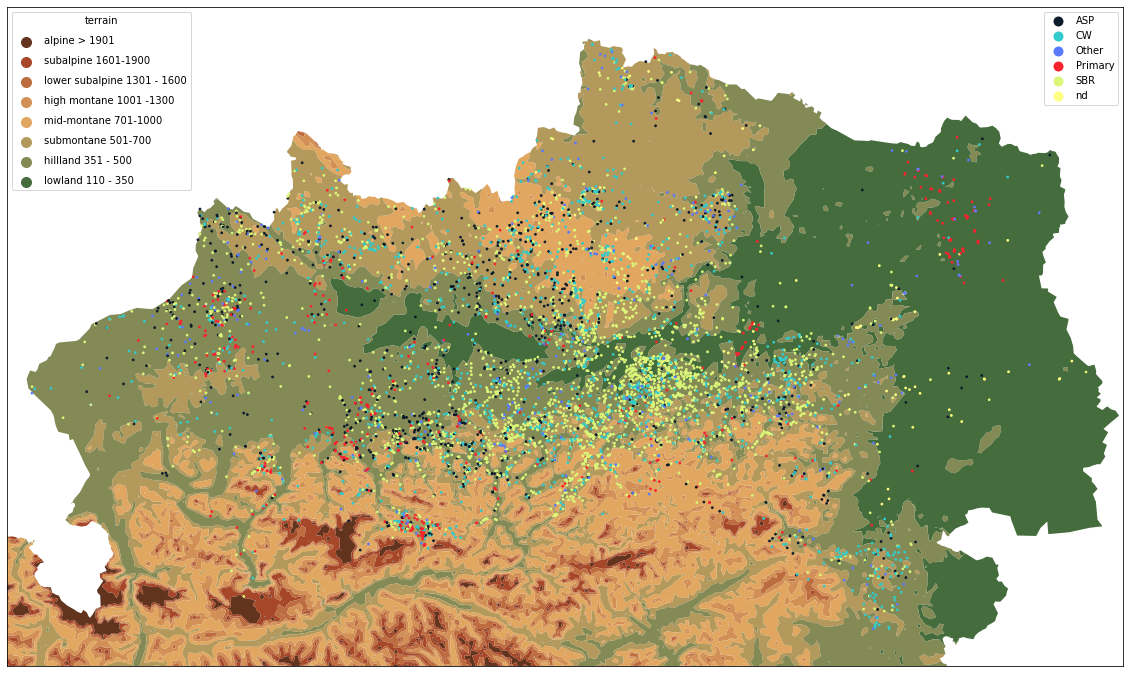

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=True)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
#BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

for value,color in zip(list(reversed(terrain_labels)),color_list):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1, title='terrain',bbox_transform=ax.transAxes, bbox_to_anchor=[0, 1])
small.plot(ax=ax,categorical=True,column='tech_type',legend=True, markersize=3, cmap=cmap_tech)
#missing_dist.geometry.boundary.plot(ax=ax)


ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_points_tech.png', bbox_inches='tight' )

# plot development of medium non nitrifying

IndexError: index 0 is out of bounds for axis 0 with size 0

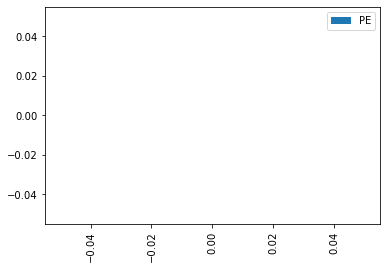

In [ ]:
medium=data[data.PE>50]
to_plot=medium.groupby(['year','no_nitri']).count().reset_index()
to_plot[to_plot.no_nitri=='1'].plot.bar(x='year',y='PE')


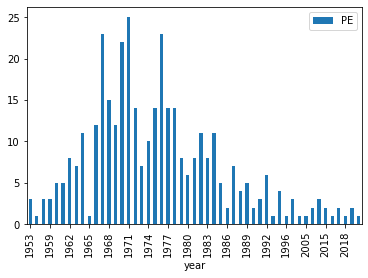

In [ ]:
small=data[(data.PE<50)&(data.year>1905)]
to_plot=small.groupby(['year','no_nitri']).count().reset_index()
to_plot[to_plot.no_nitri=='1'].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)


IndexError: index 0 is out of bounds for axis 0 with size 0

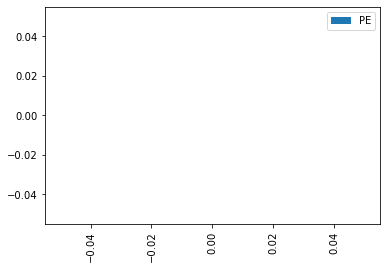

In [ ]:
data=data[(data.year>1905)]
to_plot=data.groupby(['year','no_nitri']).count().reset_index()
to_plot[to_plot.no_nitri=='1'].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)
